In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
# By Alexandra Lee
# (updated October 2018)
# 
# Main
#
# Dataset: Pseudomonas aeruginosa gene expression from compendium 
# referenced in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5069748/
# 
# Condition: expression of PA1673 gene
#
# Task: To predict the expression of other (non-PA1673) genes by:
#        1. Define offset vector = avg(expression of genes corresponding to high levels of PA1673) 
#           - avg(expression of genes corresponding to low levels of PA1673)
#        2. scale factor = how far along the gradient of low-high PA1673 expression
#        3. prediction = baseline expression + scale factor * offset vector 
#-------------------------------------------------------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np

from functions import generate_input, vae, def_offset, interpolate, plot

randomState = 123
from numpy.random import seed
seed(randomState)

Using TensorFlow backend.


In [2]:
# Name of analysis
analysis_name = 'PA1673_gradient_test'

# Create list of base directories
base_dirs = [os.path.join(os.path.dirname(os.getcwd()), 'data'),
             os.path.join(os.path.dirname(os.getcwd()), 'encoded'),
             os.path.join(os.path.dirname(os.getcwd()), 'models'),
             os.path.join(os.path.dirname(os.getcwd()), 'output'),
             os.path.join(os.path.dirname(os.getcwd()), 'stats'),
             os.path.join(os.path.dirname(os.getcwd()), 'viz')    
]

# Check if directory exist otherwise create
for each_dir in base_dirs:
    analysis_dir = os.path.join(each_dir, analysis_name)
    if os.path.exists(analysis_dir):
        print('directory already exists: {}'.format(analysis_dir))
    else:
        os.mkdir(analysis_dir)
        print('creating new directory: {}'.format(analysis_dir))

creating new directory: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/data/PA1673_gradient_test
creating new directory: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/encoded/PA1673_gradient_test
creating new directory: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/models/PA1673_gradient_test
creating new directory: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/output/PA1673_gradient_test
creating new directory: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/stats/PA1673_gradient_test
creating new directory: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/viz/PA1673_gradient_test


/home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/scripts/functions/vae.py:259: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.
  vae.compile(optimizer=adam, loss=None, loss_weights=[beta])


Train on 1072 samples, validate on 119 samples
Epoch 1/200
1072/1072 [==============================] - 1s 1ms/step - loss: 3755.3859 - val_loss: 3624.7536
Epoch 2/200
1072/1072 [==============================] - 1s 875us/step - loss: 3590.7310 - val_loss: 3597.6810
Epoch 3/200
1072/1072 [==============================] - 1s 845us/step - loss: 3525.8874 - val_loss: 3628.3580
Epoch 4/200
1072/1072 [==============================] - 1s 833us/step - loss: 3498.5139 - val_loss: 3649.1132
Epoch 5/200
1072/1072 [==============================] - 1s 826us/step - loss: 3486.8724 - val_loss: 3590.0223
Epoch 6/200
1072/1072 [==============================] - 1s 844us/step - loss: 3476.6528 - val_loss: 3567.3612
Epoch 7/200
1072/1072 [==============================] - 1s 862us/step - loss: 3471.1517 - val_loss: 3537.0503
Epoch 8/200
1072/1072 [==============================] - 1s 827us/step - loss: 3468.8084 - val_loss: 3507.1463
Epoch 9/200
1072/1072 [==============================] - 1s 849us/s

Epoch 74/200
1072/1072 [==============================] - 1s 1ms/step - loss: 3382.0596 - val_loss: 3402.9991
Epoch 75/200
1072/1072 [==============================] - 1s 983us/step - loss: 3384.3661 - val_loss: 3406.6225
Epoch 76/200
1072/1072 [==============================] - 1s 911us/step - loss: 3381.3467 - val_loss: 3400.5376
Epoch 77/200
1072/1072 [==============================] - 1s 860us/step - loss: 3380.3798 - val_loss: 3403.4284
Epoch 78/200
1072/1072 [==============================] - 1s 852us/step - loss: 3381.5588 - val_loss: 3400.4234
Epoch 79/200
1072/1072 [==============================] - 1s 867us/step - loss: 3381.2079 - val_loss: 3398.1826
Epoch 80/200
1072/1072 [==============================] - 1s 865us/step - loss: 3380.4127 - val_loss: 3397.8328
Epoch 81/200
1072/1072 [==============================] - 1s 829us/step - loss: 3378.1013 - val_loss: 3395.5422
Epoch 82/200
1072/1072 [==============================] - 1s 859us/step - loss: 3378.7877 - val_loss: 3395

Epoch 147/200
1072/1072 [==============================] - 1s 848us/step - loss: 3354.8383 - val_loss: 3378.7130
Epoch 148/200
1072/1072 [==============================] - 1s 892us/step - loss: 3352.4946 - val_loss: 3375.9772
Epoch 149/200
1072/1072 [==============================] - 1s 860us/step - loss: 3353.7857 - val_loss: 3380.9402
Epoch 150/200
1072/1072 [==============================] - 1s 885us/step - loss: 3353.7951 - val_loss: 3379.1007
Epoch 151/200
1072/1072 [==============================] - 1s 819us/step - loss: 3353.7946 - val_loss: 3378.0195
Epoch 152/200
1072/1072 [==============================] - 1s 876us/step - loss: 3352.6157 - val_loss: 3374.5444
Epoch 153/200
1072/1072 [==============================] - 1s 977us/step - loss: 3352.6851 - val_loss: 3376.3193
Epoch 154/200
1072/1072 [==============================] - 1s 966us/step - loss: 3353.1436 - val_loss: 3375.4848
Epoch 155/200
1072/1072 [==============================] - 1s 827us/step - loss: 3352.3011 - val

/home/alexandra/anaconda3/envs/Pa/lib/python3.5/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Number of genes in low expression group is (60, 5548)
Number of gene in high expression group is (60, 5548)


/home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/scripts/functions/plot.py:46: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  X_sorted = X.loc[sorted_id.index].dropna()


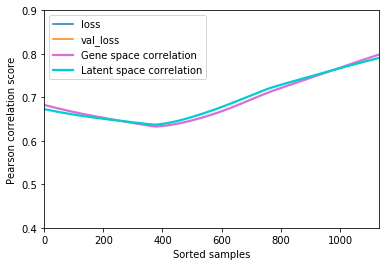

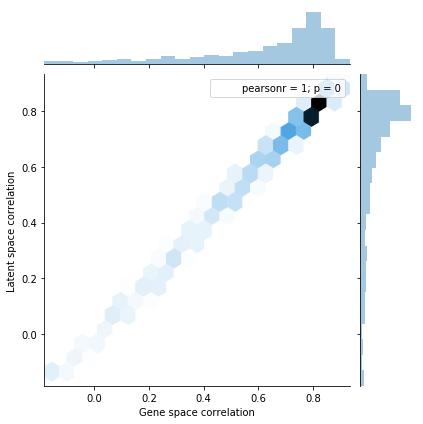

In [3]:
# Pre-process input
data_dir = os.path.join(base_dirs[0], analysis_name)
generate_input.generate_input_PA1673_gradient(data_dir)

# Run Tybalt
learning_rate = 0.001
batch_size = 100
epochs = 200
kappa = 0.01
intermediate_dim = 100
latent_dim = 10
epsilon_std = 1.0

base_dir = os.path.dirname(os.getcwd())
vae.tybalt_2layer_model(learning_rate, batch_size, epochs, kappa, intermediate_dim, latent_dim, epsilon_std, base_dir, analysis_name)


# Define offset vectors in gene space and latent space
data_dir = os.path.join(base_dirs[0], analysis_name)
target_gene = "PA1673"
percent_low = 5
percent_high = 95

def_offset.gene_space_offset(data_dir, target_gene, percent_low, percent_high)

model_dir = os.path.join(base_dirs[2], analysis_name)
encoded_dir = os.path.join(base_dirs[1], analysis_name)

def_offset.latent_space_offset(data_dir, model_dir, encoded_dir, target_gene, percent_low, percent_high)


# Predict gene expression using offset in gene space and latent space
out_dir = os.path.join(base_dirs[3], analysis_name)

interpolate.interpolate_in_gene_space(data_dir, target_gene, out_dir, percent_low, percent_high)
interpolate.interpolate_in_latent_space(data_dir, model_dir, encoded_dir, target_gene, out_dir, percent_low, percent_high)


# Plot prediction per sample along gradient of PA1673 expression
viz_dir = os.path.join(base_dirs[5], analysis_name)
plot.plot_corr_gradient(out_dir, viz_dir)